In [1]:
%load_ext autoreload
%autoreload 2
import constrained as cd
from constrained.constraints import inset, aligned_vertically, distributed_vertically, aligned_horizontally, distributed_horizontally

Solved 20 constraints in 0.008s


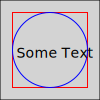

In [16]:
from constrained.constraints import aligned_vertically, aligned_horizontally
from constrained.primitive import Rect, Circle, Group, Text
from constrained.core import Canvas, Style
from constrained import solve

rect = Rect(width=75, height=75, style=Style(outline="red"))
circle = Circle(style=Style(outline="blue"))
text = Text("Some Text")
bg = Rect(top_left=(0, 0), width=100, height=100, style=Style(fill="lightgrey"))
group = Group([bg, rect, circle, text], [
    aligned_vertically([rect, circle, text]),
    aligned_horizontally([rect, circle, text]),
    rect.bounds.width == 2 * circle.radius,
    bg.bounds.center == rect.bounds.center,
])
canvas = Canvas(100, 100, group)
solve(canvas)